## 11.4 Searching permutations

As the previous section illustrated, an exhaustive search algorithm with
_n_ nested loops can generate all permutations of _n_ items and
test which of them satisfy the search conditions.
That's fine if _n_ is small and known in advance,
but if _n_ is an input of the problem, how can we generate the permutations?
This section shows how with a classic problem.

### 11.4.1 Problem

The **travelling salesman problem** (**TSP**) asks to find the shortest way to
start in one place, visit other places only once and return to the start place,
where 'shortest way' means the least total distance travelled.

A **tour** is a route that goes once through each place and
returns to the start place, e.g. the route of a truck delivering or collecting
goods across multiple places and returning to the warehouse.
The TSP is thus asking for the tour with the least total distance,
given the distances between _n_ places. We assume there are
at least two places, in order to travel to a place and back to the start place.

If instead of the distance
we know the time or cost to go from one place to another,
then the TSP asks for the respectively fastest or cheapest tour.
If multiple tours are equally short, fast or cheap,
then the output can be any of them.

Problems that ask for a collection of items that minimise or maximise some
quantity are  **optimisation problems**.
When talking about optimisation problems in general,
the quantity being minimised is traditionally called the **cost**,
even if it represents something else, like distance, for particular problems.
So, the TSP is an optimisation problem that asks for a tour among _n_ places
with the lowest cost, given the costs of travelling between any two places.

<div class="alert alert-info">
<strong>Info:</strong> The Robotics and AI block of TM129 introduces optimisation problems and the TSP.
</div>

To turn the informal description of the TSP into a problem definition,
I must choose how to model places and costs.
Whether we're flying around the globe with a band,
visiting castles in Scotland or island-hopping in the Azores,
it doesn't matter what and where the places are:
all we need is the cost of travelling between any two of them.
The costs must be given by numbers, so that we can add up the cost of the tour.
Although costs are usually positive, I allow for zero and negative numbers,
e.g. if we wish to represent the cost below or above a given travel budget.

There are several ways of representing the costs between pairs of places.
A simple way of quickly looking up costs is to store them in a matrix.
This means that places must be represented by natural numbers,
in order to index the matrix. We have to decide whether the cost of going
from _origin_ to _destination_ is in
row _origin_ and column _destination_, or row _destination_ and column _origin_.
It doesn't matter which way it is, as long as we state it in the preconditions,
so that the user knows how to fill the input matrix.

Next, the output: the best tour.
It can be represented by a sequence of integers,
indicating in which order the places are visited.
The postconditions must state that all places occur in the tour and
that the first and last place are the same.
They must also define the optimisation criterion: the tour's cost.

**Function**: TSP\
**Inputs**: _costs_, a _n_×_n_ matrix of numbers\
**Preconditions**: _n_ ≥ 2;
_costs_[*i*][*j*] is the cost of travelling from _i_ to _j_\
**Output**: _tour_, a sequence of integers\
**Postconditions**:

- _tour_ has length _n_ + 1, with _tour_[0] = _tour_[*n*]
- every integer from 0 to _n_ − 1 occurs in _tour_
- _costs_[_tour_[0]][_tour_[1]] + _costs_[_tour_[1]][_tour_[2]] + ... + _costs_[_tour_[_n_ − 1]][_tour_[*n*]] has the lowest possible value

Because the tour has length _n_ + 1, with one duplicate place,
all other places must occur once in the tour.

Here's a depiction of the example I'll use, with _n_ = 4.
In this example, travelling from A to B costs the same as from B to A.
The places are numbered from 0 to 3 and indicated by circles.
The cost of travelling between two places is indicated
next to the line connecting the two places.

![This figure shows four circles, labelled 0 to 3, and a straight line between each pair of circles. Each line is labelled with an integer denoting the cost of travelling between those places. It costs 15 to travel between 0 and 1, 10 between 0 and 2 and between 2 and 3, 5 between 0 and 3 and between 3 and 1, and 30 between 1 and 2.](11_4_tsp.png)

Can you find at least two tours with the same lowest cost?
Two tours are different if their start/end place is different or
if they visit the places in a different order.

___

Some of the tours with lowest cost 40 are (0, 1, 3, 2, 0), (1, 3, 2, 0, 1) and
(3, 1, 0, 2, 3).

### 11.4.2 Algorithm

The exhaustive search algorithm is like a linear search for
the best candidate, where the candidates are all possible tours and
being better means to have a lower cost.

Tours that go through the same places in the same order have the same cost, so
to find the best tour it doesn't matter which place we start from,
as the example above shows.
We can choose place 0 to be the start and end place
and generate all permutations of (1, ..., _n_ – 1) for the intermediate places.

We compute the cost of each candidate tour and see if it improves
the current best cost, which is initially infinite.
(If we were maximising a quantity, we'd initialise it with negative infinity.)

1. let _best cost_ be infinite
2. for each _places_ that is a permutation of (1, 2, ..., _n_ – 1):
   1. let _this tour_ be _places_ with 0 prepended and appended
   1. let _cost_ be _costs_[_this tour_[0]][_this tour_[1]] + ... + _costs_[_this tour_[_n_ − 1]][_this tour_[*n*]]
   2. if _total cost_ < _best cost_:
      1. let _best cost_ be _total cost_
      2. let _tour_ be _this tour_

#### Exercise 11.4.1

In many real-life situations,
the cost of going from A to B is the same as the cost of going from B to A,
like in the example above. In such cases,
will the algorithm generate different candidate tours with the same total cost?

_Write your answer here._

[Hint](../31_Hints/Hints_11_4_01.ipynb)
[Answer](../32_Answers/Answers_11_4_01.ipynb)

### 11.4.3 Complexity

There are _n_ × (_n_−1) × ... × 2 × 1 permutations of _n_ items,
because the first item in the permutation can be any of the _n_ items,
the second item in the permutation can be any of the remaining _n_−1 items,
and so on, until only one item remains to be put in the last position.

The product of all integers from 1 to _n_ is written _n_! and
is called the **factorial** of n.
There's only one permutation of zero items, the empty sequence, so 0! = 1.

The exhaustive search for the best tour among _n_ places only generates
the permutations of (1, ..., _n_ – 1), because the start/end place is fixed,
so the complexity is Θ((_n_−1)!).

The factorial grows much much faster than the square or the cube of a number.
A picture shows it best. (You don't have to understand the following code.)

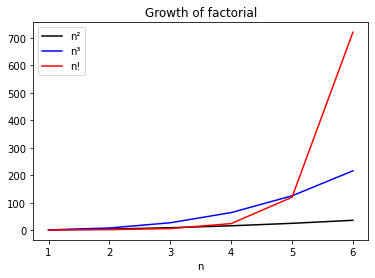

In [1]:
import math
from matplotlib.pyplot import plot, xlabel, title, legend, show

%matplotlib inline

n_values = range(1, 7)
n_square = []
n_cube = []
n_factorial = []
for n in n_values:
    n_square.append(n*n)
    n_cube.append(n*n*n)
    n_factorial.append(math.factorial(n))

plot(n_values, n_square, 'k-', label='n²')
plot(n_values, n_cube, 'b-', label='n³')
plot(n_values, n_factorial,'r-', label='n!')
title('Growth of factorial')
xlabel('n')
legend()
show()

As the chart shows, 5! is about the same as 5³ but from then on
the factorial function leaves the cubic function in the dust.
If you replace 7 with 10 or some other slightly larger value in the
range for `n_values` and run the code, you'll see that *n*³ will look
like a constant function in comparison to _n_!.

I once asked the driver delivering my supermarket online shopping how
many customers he served in one tour with a full van. He said about fifteen.
Assuming we can compute the cost of each tour in 1&nbsp;µs,
we can compute a van's best tour in about&nbsp;...

In [2]:
print(round(math.factorial(15) / 1e6 / 60 / 60 / 24), 'days')

15 days


By comparison, if the van delivers to 10 customers,
then the best tour can be computed in just&nbsp;...

In [3]:
print(round(math.factorial(10) / 1e6), 'seconds')

4 seconds


This shows again how fast the factorial function grows.

As you may imagine, delivery companies don't use exhaustive search,
with factorial complexity, to compute the best tour.
They use **heuristic** algorithms which compute an approximate 'good enough'
solution, rather than the optimal one.
One such algorithm will be presented in a later chapter.

#### Exercise 11.4.2

The previous exercise showed that the algorithm generates 'symmetric' tours.
Would the complexity improve if the algorithm could be modified
to not generate them?

_Write your answer here._

[Answer](../32_Answers/Answers_11_4_02.ipynb)

### 11.4.4 Code

You'll see in a later chapter an algorithm to generate permutations for any _n_.
For the time being, we use function `permutations` in module `itertools`.
The function is meant to be used in a for-loop because
it returns the permutations one by one, as a tuple.
The function's argument is an iterable collection of items.

In [4]:
from itertools import permutations

for permutation in permutations({'travelling', 'salesman', 'problem'}):
    print(permutation)

('salesman', 'problem', 'travelling')
('salesman', 'travelling', 'problem')
('problem', 'salesman', 'travelling')
('problem', 'travelling', 'salesman')
('travelling', 'salesman', 'problem')
('travelling', 'problem', 'salesman')


Let's construct the matrix of the example input.
The cost of 'travelling' from a place to itself can be any number,
because it won't be used by the algorithm, but it's usually set to zero.

In [5]:
four_places = [
    [0, 15, 10, 5],     # cost from 0 to other places
    [15, 0, 30, 5],     # cost from 1 to other places
    [10, 30, 0, 10],    # cost from 2 to other places
    [5, 5, 10, 0],      # cost from 3 to other places
]

I use slightly different variable names from the algorithm
to keep the code lines short.

In [6]:
from itertools import permutations
import math

def tsp(costs: list) -> tuple:
    """Solve the travelling salesman problem.

    Input: costs is a n*n matrix of numbers
    Preconditions:
    - n > 1
    - costs[i][j] is the cost of travelling from i to j
    Postconditions:
    - len(output) = n + 1
    - output[0] = output[n]
    - every integer from 0 to n - 1 occurs in the output
    - costs[output[0]][output[1]] + ... + costs[output[n-1]][output[n]]
      has the lowest possible value
    """
    best_cost = math.inf    # positive infinity (Section 6.8)
    n = len(costs)
    # generate all permutations of (1, .., n-1)
    for places in permutations(range(1, n)):
        # tuple literals with 1 item need extra comma (Section 4.5)
        tour = (0,) + places + (0,)
        cost = 0
        for index in range(0, n):
            cost = cost + costs[tour[index]][tour[index+1]]
        if cost < best_cost:
            best_cost = cost
            best_tour = tour
    return best_tour

tsp(four_places)

(0, 1, 3, 2, 0)

There are two equally best tours starting and ending at place 0,
namely (0, 1, 3, 2, 0) and (0, 3, 2, 1, 0),
but only the one generated first is output as the second one
doesn't improve the best cost.

⟵ [Previous section](11_3_constraints.ipynb) | [Up](11-introduction.ipynb) | [Next section](11_5_subsets.ipynb) ⟶